In [2]:
import numpy as np
import pyeeg as pe
import pickle as pickle
import pandas as pd
import math

from sklearn import svm
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

import os
import tensorflow as tf
import time

from keras.layers import Convolution1D, ZeroPadding1D, MaxPooling1D, BatchNormalization, Activation, Dropout, Flatten, Dense
from keras.regularizers import l2

import pickle

import pandas as pd
import keras.backend as K
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Sequential
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical 
from keras.layers import Flatten
from keras.layers import Dense
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras.models import Model
import timeit
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution1D, MaxPooling1D, ZeroPadding1D
from keras.optimizers import SGD
#import cv2, numpy as np
import warnings
warnings.filterwarnings('ignore')

from numpy import array
from sklearn.model_selection import KFold
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt 

In [3]:
channel = [1,2,3,4,6,11,13,17,19,20,21,25,29,31] #14 Channels chosen to fit Emotiv Epoch+
band = [4,8,12,16,25,45] #5 bands
window_size = 256 #Averaging band power of 2 sec
step_size = 16 #Each 0.125 sec update once
sample_rate = 128 #Sampling rate of 128 Hz
subjectList = ['01','02','03', '04']
print(type(subjectList[1]))
#List of subjects

<class 'str'>


In [4]:
data=[]
labels=[]

for subjects in subjectList:   
    subject = np.load(open('data_preprocessed_python\\s' + subjects + '.npy','rb'),allow_pickle=True)

    for i in range (0,subject.shape[0]):
        # loop over 0-39 trails
        data.append(subject[i][0])
        labels.append(subject[i][1])

In [5]:
print(len(data)) #shape is 19520, 70
print(len(labels))#shape is 19520, 4

78080
78080


In [6]:
traindatalist = []
testdatalist = []

data = array(data)

print(data[0][0])

kfold = KFold(5, True, random_state = 1)
#this will split train test = 4:1
fold=1

#-------------FOR DATA-----------------
for train, test in kfold.split(data):
    traindatalist.append(data[train])
    testdatalist.append(data[test])
    print("fold number ", fold)
    fold+=1

print("data train size: ", len(traindatalist))
print("data test size ", len(testdatalist))

613.6636210414781
fold number  1
fold number  2
fold number  3
fold number  4
fold number  5
data train size:  5
data test size  5


In [7]:
testlabellist = []
trainlabellist = []

labels = array(labels)

kfold = KFold(5, True, random_state = 1)
fold = 1
for train, test in kfold.split(labels):
    trainlabellist.append(labels[train])
    #print(len(trainlabellist))
    testlabellist.append(labels[test])
    print("fold number "
          , fold)
    fold+=1

print("label train size: ", len(trainlabellist))
print("label test size ", len(testlabellist))

fold number  1
fold number  2
fold number  3
fold number  4
fold number  5
label train size:  5
label test size  5


In [8]:
print(len(trainlabellist[0]))
print(len(testlabellist[0]))

print(len(traindatalist[0]))
print(len(testdatalist[0]))

62464
15616
62464
15616


### trainlabellist, testlabellist, traindatalist, testdatalist contains data for all 5 folds. trainlabellist[0] is for fold 1 etc

# FOLD ONE

In [10]:
#saving the first fold first
np.save('data_preprocessed_python\\fold_1_data_train_again3', np.array(traindatalist[0]), allow_pickle=True, fix_imports=True)
np.save('data_preprocessed_python\\fold_1_data_test_again3', np.array(testdatalist[0]), allow_pickle=True, fix_imports=True)
print("first fold data train data test:", np.array(traindatalist[0]).shape, np.array(testdatalist[0]).shape)

first fold data train data test: (62464, 70) (15616, 70)


In [11]:
np.save('data_preprocessed_python\\fold_1_label_train_again3', np.array(trainlabellist[0]), allow_pickle=True, fix_imports=True)
np.save('data_preprocessed_python\\fold_1_label_test_again3', np.array(testlabellist[0]), allow_pickle=True, fix_imports=True)
print("first fold label train data test:", np.array(trainlabellist[0]).shape, np.array(testlabellist[0]).shape)

first fold label train data test: (62464, 4) (15616, 4)


### Preprocessing

In [9]:
# with open('data_preprocessed_python\\data_training.npy', 'rb') as fileTrain:
#     X  = np.load(fileTrain)
    
# with open('data_preprocessed_python\\label_training.npy', 'rb') as fileTrainL:
#     Y  = np.load(fileTrainL)
    
with open('data_preprocessed_python\\fold_1_data_train_again3.npy', 'rb') as fileTrain:
    X  = np.load(fileTrain)
    
with open('data_preprocessed_python\\fold_1_label_train_again3.npy', 'rb') as fileTrainL:
    Y  = np.load(fileTrainL)
    
X = normalize(X)
Z = np.ravel(Y[:, [1]])

Arousal_Train = np.ravel(Y[:, [0]])
Valence_Train = np.ravel(Y[:, [1]])
Domain_Train = np.ravel(Y[:, [2]])
Like_Train = np.ravel(Y[:, [3]])

from keras.utils import to_categorical
y_train = to_categorical(Z)
y_train

x_train = np.array(X[:])

In [10]:
with open('data_preprocessed_python\\fold_1_data_test_again3.npy', 'rb') as fileTrain:
    M  = np.load(fileTrain)
    
with open('data_preprocessed_python\\fold_1_label_test_again3.npy', 'rb') as fileTrainL:
    N  = np.load(fileTrainL)
M = normalize(M)
L = np.ravel(N[:, [1]])

Arousal_Test = np.ravel(N[:, [0]])
Valence_Test = np.ravel(N[:, [1]])
Domain_Test = np.ravel(N[:, [2]])
Like_Test = np.ravel(N[:, [3]])

x_test = np.array(M[:])

from keras.utils import to_categorical
y_test = to_categorical(L)
y_test

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [11]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1], 1)

print(x_train.shape)

(62464, 70, 1)


# Hyperparameters

In [12]:
batch_size = 256
num_classes = 10
epochs = 200
input_shape=(x_train.shape[1], 1)

print(input_shape)

(70, 1)


## The Model

In [16]:
model = Sequential()
intput_shape=(x_train.shape[1], 1)
model.add(Conv1D(128, kernel_size=3,padding = 'same',activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(2)))
model.add(Conv1D(128,kernel_size=3,padding = 'same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=(2)))
#model.add(Conv1D(64,kernel_size=3,padding = 'same', activation='relu'))
#model.add(MaxPooling1D(pool_size=(2)))
model.add(Flatten())
model.add(Dense(64, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 70, 128)           512       
_________________________________________________________________
batch_normalization (BatchNo (None, 70, 128)           512       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 35, 128)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 35, 128)           49280     
_________________________________________________________________
batch_normalization_1 (Batch (None, 35, 128)           512       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 17, 128)           0         
_________________________________________________________________
flatten (Flatten)            (None, 2176)              0

In [28]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [29]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("fold_1_model_final2.hdf5", monitor='accuracy', verbose=1,
    save_best_only=True, mode='auto', period=1)

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[checkpoint])

Epoch 1/200
244/244 [==============================] - ETA: 0s - loss: 1.6686 - accuracy: 0.4762
Epoch 00001: accuracy improved from -inf to 0.47621, saving model to fold_1_model_final2.hdf5
244/244 [==============================] - 38s 156ms/step - loss: 1.6686 - accuracy: 0.4762 - val_loss: 1.1514 - val_accuracy: 0.5845
Epoch 2/200
244/244 [==============================] - ETA: 0s - loss: 1.2871 - accuracy: 0.5429
Epoch 00002: accuracy improved from 0.47621 to 0.54289, saving model to fold_1_model_final2.hdf5
244/244 [==============================] - 35s 144ms/step - loss: 1.2871 - accuracy: 0.5429 - val_loss: 1.0421 - val_accuracy: 0.6303
Epoch 3/200
244/244 [==============================] - ETA: 0s - loss: 1.2041 - accuracy: 0.5720 
Epoch 00003: accuracy improved from 0.54289 to 0.57203, saving model to fold_1_model_final2.hdf5
244/244 [==============================] - 4625s 19s/step - loss: 1.2041 - accuracy: 0.5720 - val_loss: 1.0001 - val_accuracy: 0.6438
Epoch 4/200
244/24

Epoch 26/200
244/244 [==============================] - ETA: 0s - loss: 0.9462 - accuracy: 0.6564
Epoch 00026: accuracy improved from 0.65563 to 0.65644, saving model to fold_1_model_final2.hdf5
244/244 [==============================] - 38s 155ms/step - loss: 0.9462 - accuracy: 0.6564 - val_loss: 0.8461 - val_accuracy: 0.6899
Epoch 27/200
244/244 [==============================] - ETA: 0s - loss: 0.9359 - accuracy: 0.6601
Epoch 00027: accuracy improved from 0.65644 to 0.66008, saving model to fold_1_model_final2.hdf5
244/244 [==============================] - 39s 161ms/step - loss: 0.9359 - accuracy: 0.6601 - val_loss: 0.8424 - val_accuracy: 0.6923
Epoch 28/200
244/244 [==============================] - ETA: 0s - loss: 0.9274 - accuracy: 0.6627
Epoch 00028: accuracy improved from 0.66008 to 0.66267, saving model to fold_1_model_final2.hdf5
244/244 [==============================] - 38s 154ms/step - loss: 0.9274 - accuracy: 0.6627 - val_loss: 0.8315 - val_accuracy: 0.6975
Epoch 29/200


Epoch 52/200
244/244 [==============================] - ETA: 0s - loss: 0.8558 - accuracy: 0.6883
Epoch 00052: accuracy improved from 0.68657 to 0.68825, saving model to fold_1_model_final2.hdf5
244/244 [==============================] - 47s 192ms/step - loss: 0.8558 - accuracy: 0.6883 - val_loss: 0.7882 - val_accuracy: 0.7212
Epoch 53/200
244/244 [==============================] - ETA: 0s - loss: 0.8498 - accuracy: 0.6913
Epoch 00053: accuracy improved from 0.68825 to 0.69128, saving model to fold_1_model_final2.hdf5
244/244 [==============================] - 47s 191ms/step - loss: 0.8498 - accuracy: 0.6913 - val_loss: 0.7791 - val_accuracy: 0.7230
Epoch 54/200
244/244 [==============================] - ETA: 0s - loss: 0.8493 - accuracy: 0.6907
Epoch 00054: accuracy did not improve from 0.69128
244/244 [==============================] - 44s 182ms/step - loss: 0.8493 - accuracy: 0.6907 - val_loss: 0.8007 - val_accuracy: 0.7159
Epoch 55/200
244/244 [==============================] - ETA

Epoch 105/200
244/244 [==============================] - ETA: 0s - loss: 0.7485 - accuracy: 0.7319
Epoch 00105: accuracy did not improve from 0.73394
244/244 [==============================] - 55s 226ms/step - loss: 0.7485 - accuracy: 0.7319 - val_loss: 0.7278 - val_accuracy: 0.7499
Epoch 106/200
244/244 [==============================] - ETA: 0s - loss: 0.7478 - accuracy: 0.7320
Epoch 00106: accuracy did not improve from 0.73394
244/244 [==============================] - 50s 205ms/step - loss: 0.7478 - accuracy: 0.7320 - val_loss: 0.7458 - val_accuracy: 0.7441
Epoch 107/200
244/244 [==============================] - ETA: 0s - loss: 0.7486 - accuracy: 0.7336
Epoch 00107: accuracy did not improve from 0.73394
244/244 [==============================] - 52s 214ms/step - loss: 0.7486 - accuracy: 0.7336 - val_loss: 0.7356 - val_accuracy: 0.7455
Epoch 108/200
244/244 [==============================] - ETA: 0s - loss: 0.7438 - accuracy: 0.7337
Epoch 00108: accuracy did not improve from 0.7339

Epoch 132/200
244/244 [==============================] - ETA: 0s - loss: 0.7116 - accuracy: 0.7480
Epoch 00132: accuracy did not improve from 0.74848
244/244 [==============================] - 45s 184ms/step - loss: 0.7116 - accuracy: 0.7480 - val_loss: 0.7193 - val_accuracy: 0.7578
Epoch 133/200
244/244 [==============================] - ETA: 0s - loss: 0.7089 - accuracy: 0.7496 ETA: 0s - loss: 0.7091 - accuracy: 0.74
Epoch 00133: accuracy improved from 0.74848 to 0.74955, saving model to fold_1_model_final2.hdf5
244/244 [==============================] - 55s 225ms/step - loss: 0.7089 - accuracy: 0.7496 - val_loss: 0.6917 - val_accuracy: 0.7628
Epoch 134/200
244/244 [==============================] - ETA: 0s - loss: 0.7005 - accuracy: 0.7522
Epoch 00134: accuracy improved from 0.74955 to 0.75219, saving model to fold_1_model_final2.hdf5
244/244 [==============================] - 53s 219ms/step - loss: 0.7005 - accuracy: 0.7522 - val_loss: 0.6962 - val_accuracy: 0.7641
Epoch 135/200
24

244/244 [==============================] - ETA: 0s - loss: 0.6706 - accuracy: 0.7662
Epoch 00159: accuracy improved from 0.76455 to 0.76622, saving model to fold_1_model_final2.hdf5
244/244 [==============================] - 39s 161ms/step - loss: 0.6706 - accuracy: 0.7662 - val_loss: 0.6787 - val_accuracy: 0.7729
Epoch 160/200
244/244 [==============================] - ETA: 0s - loss: 0.6609 - accuracy: 0.7674
Epoch 00160: accuracy improved from 0.76622 to 0.76735, saving model to fold_1_model_final2.hdf5
244/244 [==============================] - 41s 169ms/step - loss: 0.6609 - accuracy: 0.7674 - val_loss: 0.6853 - val_accuracy: 0.7714
Epoch 161/200
244/244 [==============================] - ETA: 0s - loss: 0.6667 - accuracy: 0.7658
Epoch 00161: accuracy did not improve from 0.76735
244/244 [==============================] - 40s 164ms/step - loss: 0.6667 - accuracy: 0.7658 - val_loss: 0.6771 - val_accuracy: 0.7695
Epoch 162/200
244/244 [==============================] - ETA: 0s - los

In [30]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print(score)

488/488 [==============================] - 2s 4ms/step - loss: 0.6528 - accuracy: 0.7862
Test loss: 0.6527641415596008
Test accuracy: 0.786180853843689
[0.6527641415596008, 0.786180853843689]


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


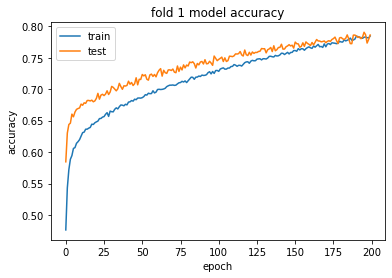

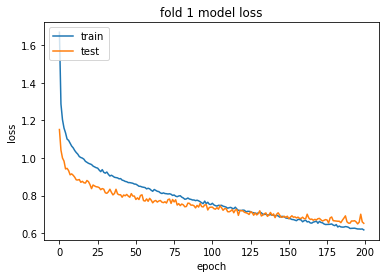

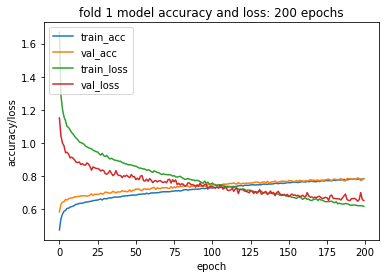

In [31]:
# list all data in history
import matplotlib.pyplot as plt 

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('fold 1 model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('fold 1 model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#trying to combine both
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('fold 1 model accuracy and loss: 200 epochs')
plt.ylabel('accuracy/loss')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc','train_loss','val_loss'], loc='upper left')
plt.show()

# Fold 2

In [20]:
def trainfold(foldnum):
    #saving the first fold first
    np.save('data_preprocessed_python\\fold_' + str(foldnum) + '_data_train_again3', np.array(traindatalist[0]), allow_pickle=True, fix_imports=True)
    np.save('data_preprocessed_python\\fold_' + str(foldnum) + '_data_test_again3', np.array(testdatalist[0]), allow_pickle=True, fix_imports=True)
    print("fold data train data test:", np.array(traindatalist[0]).shape, np.array(testdatalist[0]).shape)

    np.save('data_preprocessed_python\\fold_' + str(foldnum) + '_label_train_again3', np.array(trainlabellist[0]), allow_pickle=True, fix_imports=True)
    np.save('data_preprocessed_python\\fold_' + str(foldnum) + '_label_test_again3', np.array(testlabellist[0]), allow_pickle=True, fix_imports=True)
    print("fold label train data test:", np.array(trainlabellist[0]).shape, np.array(testlabellist[0]).shape)

    ### Preprocessing    
    with open('data_preprocessed_python\\fold_' + str(foldnum) + '_data_train_again3.npy', 'rb') as fileTrain:
        X  = np.load(fileTrain)
    
    with open('data_preprocessed_python\\fold_' + str(foldnum) + '_label_train_again3.npy', 'rb') as fileTrainL:
        Y  = np.load(fileTrainL)
    
    X = normalize(X)
    Z = np.ravel(Y[:, [1]])

    Arousal_Train = np.ravel(Y[:, [0]])
    Valence_Train = np.ravel(Y[:, [1]])
    Domain_Train = np.ravel(Y[:, [2]])
    Like_Train = np.ravel(Y[:, [3]])

    y_train = to_categorical(Z)
    print(y_train)

    x_train = np.array(X[:])
    
    with open('data_preprocessed_python\\fold_' + str(foldnum) + '_data_test_again3.npy', 'rb') as fileTrain:
        M  = np.load(fileTrain)
    
    with open('data_preprocessed_python\\fold_' + str(foldnum) + '_label_test_again3.npy', 'rb') as fileTrainL:
        N  = np.load(fileTrainL)
    M = normalize(M)
    L = np.ravel(N[:, [1]])

    Arousal_Test = np.ravel(N[:, [0]])
    Valence_Test = np.ravel(N[:, [1]])
    Domain_Test = np.ravel(N[:, [2]])
    Like_Test = np.ravel(N[:, [3]])

    x_test = np.array(M[:])

    y_test = to_categorical(L)
    print(y_test)

    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.fit_transform(x_test)
    
    x_train = x_train.reshape(x_train.shape[0],x_train.shape[1], 1)
    x_test = x_test.reshape(x_test.shape[0],x_test.shape[1], 1)

    print(x_train.shape)
    
    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])
    
    checkpoint = ModelCheckpoint('fold_' + str(foldnum) + '_model_final2.hdf5', monitor='accuracy', verbose=1,
    save_best_only=True, mode='auto', period=1)

    history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[checkpoint])
    
    print('Training Finished for fold' , foldnum)
    
    score = model.evaluate(x_test, y_test, verbose=1)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

    print("score for fold", foldnum, "is", score)
    
    return history

In [50]:
history2 = trainfold(2)

fold data train data test: (62464, 70) (15616, 70)
fold label train data test: (62464, 4) (15616, 4)
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
(62464, 70, 1)
Epoch 1/200
244/244 [==============================] - ETA: 0s - loss: 0.4704 - accuracy: 0.8443
Epoch 00001: accuracy improved from -inf to 0.84431, saving model to fold_2_model_final2.hdf5
244/244 [==============================] - 31s 127ms/step - loss: 0.4704 - accuracy: 0.8443 - val_loss: 0.5887 - val_accuracy: 0.8252
Epoch 2/200
244/244 [==============================] - ETA: 0s - loss: 0.4709 - accuracy: 0.8450
Epoch 00002: accuracy improved from 0.84431 to 0.84497, saving model to fold_2_model_final2.hdf5
244/244 [==============================] - 31s 126ms/

Epoch 27/200
244/244 [==============================] - ETA: 0s - loss: 0.4532 - accuracy: 0.8520
Epoch 00027: accuracy did not improve from 0.85291
244/244 [==============================] - 34s 138ms/step - loss: 0.4532 - accuracy: 0.8520 - val_loss: 0.5764 - val_accuracy: 0.8308
Epoch 28/200
244/244 [==============================] - ETA: 0s - loss: 0.4481 - accuracy: 0.8528
Epoch 00028: accuracy did not improve from 0.85291
244/244 [==============================] - 32s 130ms/step - loss: 0.4481 - accuracy: 0.8528 - val_loss: 0.5777 - val_accuracy: 0.8293
Epoch 29/200
244/244 [==============================] - ETA: 0s - loss: 0.4431 - accuracy: 0.8529
Epoch 00029: accuracy did not improve from 0.85291
244/244 [==============================] - 32s 132ms/step - loss: 0.4431 - accuracy: 0.8529 - val_loss: 0.6080 - val_accuracy: 0.8236
Epoch 30/200
244/244 [==============================] - ETA: 0s - loss: 0.4575 - accuracy: 0.8509
Epoch 00030: accuracy did not improve from 0.85291
24

Epoch 55/200
244/244 [==============================] - ETA: 0s - loss: 0.4382 - accuracy: 0.8566
Epoch 00055: accuracy did not improve from 0.85694
244/244 [==============================] - 34s 140ms/step - loss: 0.4382 - accuracy: 0.8566 - val_loss: 0.5863 - val_accuracy: 0.8289
Epoch 56/200
244/244 [==============================] - ETA: 0s - loss: 0.4355 - accuracy: 0.8577
Epoch 00056: accuracy improved from 0.85694 to 0.85773, saving model to fold_2_model_final2.hdf5
244/244 [==============================] - 34s 140ms/step - loss: 0.4355 - accuracy: 0.8577 - val_loss: 0.5914 - val_accuracy: 0.8301
Epoch 57/200
244/244 [==============================] - ETA: 0s - loss: 0.4366 - accuracy: 0.8570
Epoch 00057: accuracy did not improve from 0.85773
244/244 [==============================] - 32s 132ms/step - loss: 0.4366 - accuracy: 0.8570 - val_loss: 0.5976 - val_accuracy: 0.8272
Epoch 58/200
244/244 [==============================] - ETA: 0s - loss: 0.4382 - accuracy: 0.8555
Epoch 0

Epoch 111/200
244/244 [==============================] - ETA: 0s - loss: 0.4112 - accuracy: 0.8676
Epoch 00111: accuracy did not improve from 0.86789
244/244 [==============================] - 35s 143ms/step - loss: 0.4112 - accuracy: 0.8676 - val_loss: 0.5845 - val_accuracy: 0.8311
Epoch 112/200
244/244 [==============================] - ETA: 0s - loss: 0.4160 - accuracy: 0.8656
Epoch 00112: accuracy did not improve from 0.86789
244/244 [==============================] - 35s 142ms/step - loss: 0.4160 - accuracy: 0.8656 - val_loss: 0.5813 - val_accuracy: 0.8324
Epoch 113/200
244/244 [==============================] - ETA: 0s - loss: 0.4185 - accuracy: 0.8646
Epoch 00113: accuracy did not improve from 0.86789
244/244 [==============================] - 37s 151ms/step - loss: 0.4185 - accuracy: 0.8646 - val_loss: 0.5745 - val_accuracy: 0.8347
Epoch 114/200
244/244 [==============================] - ETA: 0s - loss: 0.4168 - accuracy: 0.8652
Epoch 00114: accuracy did not improve from 0.8678

Epoch 140/200
244/244 [==============================] - ETA: 0s - loss: 0.4033 - accuracy: 0.8691
Epoch 00140: accuracy did not improve from 0.86924
244/244 [==============================] - 33s 135ms/step - loss: 0.4033 - accuracy: 0.8691 - val_loss: 0.5779 - val_accuracy: 0.8373
Epoch 141/200
244/244 [==============================] - ETA: 0s - loss: 0.3977 - accuracy: 0.8711
Epoch 00141: accuracy improved from 0.86924 to 0.87106, saving model to fold_2_model_final2.hdf5
244/244 [==============================] - 33s 133ms/step - loss: 0.3977 - accuracy: 0.8711 - val_loss: 0.5695 - val_accuracy: 0.8384
Epoch 142/200
244/244 [==============================] - ETA: 0s - loss: 0.4080 - accuracy: 0.8693
Epoch 00142: accuracy did not improve from 0.87106
244/244 [==============================] - 32s 131ms/step - loss: 0.4080 - accuracy: 0.8693 - val_loss: 0.5759 - val_accuracy: 0.8369
Epoch 143/200
244/244 [==============================] - ETA: 0s - loss: 0.4026 - accuracy: 0.8694
Epo

244/244 [==============================] - ETA: 0s - loss: 0.3938 - accuracy: 0.8743 ETA: 2s
Epoch 00168: accuracy improved from 0.87426 to 0.87430, saving model to fold_2_model_final2.hdf5
244/244 [==============================] - 39s 162ms/step - loss: 0.3938 - accuracy: 0.8743 - val_loss: 0.5624 - val_accuracy: 0.8409
Epoch 169/200
244/244 [==============================] - ETA: 0s - loss: 0.3910 - accuracy: 0.8737
Epoch 00169: accuracy did not improve from 0.87430
244/244 [==============================] - 37s 150ms/step - loss: 0.3910 - accuracy: 0.8737 - val_loss: 0.5700 - val_accuracy: 0.8376
Epoch 170/200
244/244 [==============================] - ETA: 0s - loss: 0.3921 - accuracy: 0.8738
Epoch 00170: accuracy did not improve from 0.87430
244/244 [==============================] - 38s 155ms/step - loss: 0.3921 - accuracy: 0.8738 - val_loss: 0.5724 - val_accuracy: 0.8405
Epoch 171/200
244/244 [==============================] - ETA: 0s - loss: 0.3989 - accuracy: 0.8724
Epoch 001

Epoch 196/200
244/244 [==============================] - ETA: 0s - loss: 0.3831 - accuracy: 0.8770
Epoch 00196: accuracy did not improve from 0.87828
244/244 [==============================] - 35s 142ms/step - loss: 0.3831 - accuracy: 0.8770 - val_loss: 0.5929 - val_accuracy: 0.8374
Epoch 197/200
244/244 [==============================] - ETA: 0s - loss: 0.3825 - accuracy: 0.8776
Epoch 00197: accuracy did not improve from 0.87828
244/244 [==============================] - 35s 145ms/step - loss: 0.3825 - accuracy: 0.8776 - val_loss: 0.5705 - val_accuracy: 0.8426
Epoch 198/200
244/244 [==============================] - ETA: 0s - loss: 0.3894 - accuracy: 0.8759
Epoch 00198: accuracy did not improve from 0.87828
244/244 [==============================] - 35s 144ms/step - loss: 0.3894 - accuracy: 0.8759 - val_loss: 0.5706 - val_accuracy: 0.8420
Epoch 199/200
244/244 [==============================] - ETA: 0s - loss: 0.3800 - accuracy: 0.8780
Epoch 00199: accuracy did not improve from 0.8782

In [21]:
def plot_graphs(foldnum, history):
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('fold' + str(foldnum) + 'model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('fold' + str(foldnum) + 'model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    #trying to combine both
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('fold' + str(foldnum) + 'model accuracy and loss: 200 epochs')
    plt.ylabel('accuracy/loss')
    plt.xlabel('epoch')
    plt.legend(['train_acc', 'val_acc','train_loss','val_loss'], loc='upper left')
    plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


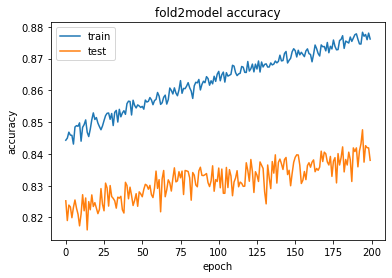

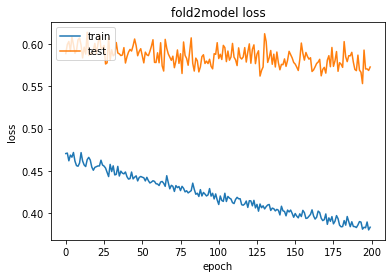

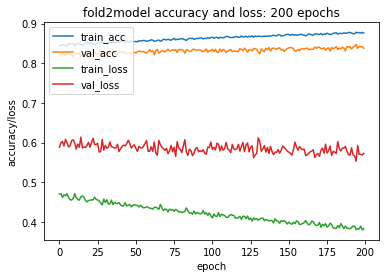

In [51]:
plot_graphs(2, history2)

# Fold 3

In [53]:
# Fold 3

model = Sequential()
intput_shape=(x_train.shape[1], 1)
model.add(Conv1D(128, kernel_size=3,padding = 'same',activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=(2)))
model.add(Conv1D(128,kernel_size=3,padding = 'same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=(2)))
#model.add(Conv1D(64,kernel_size=3,padding = 'same', activation='relu'))
#model.add(MaxPooling1D(pool_size=(2)))
model.add(Flatten())
model.add(Dense(64, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 70, 128)           512       
_________________________________________________________________
batch_normalization_2 (Batch (None, 70, 128)           512       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 35, 128)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 35, 128)           49280     
_________________________________________________________________
batch_normalization_3 (Batch (None, 35, 128)           512       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 17, 128)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2176)             

fold data train data test: (62464, 70) (15616, 70)
fold label train data test: (62464, 4) (15616, 4)
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
(62464, 70, 1)
Epoch 1/200
244/244 [==============================] - ETA: 0s - loss: 1.9915 - accuracy: 0.2643
Epoch 00001: accuracy improved from -inf to 0.26434, saving model to fold_3_model_final2.hdf5
244/244 [==============================] - 33s 134ms/step - loss: 1.9915 - accuracy: 0.2643 - val_loss: 2.0664 - val_accuracy: 0.2070
Epoch 2/200
244/244 [==============================] - ETA: 0s - loss: 1.8197 - accuracy: 0.3096
Epoch 00002: accuracy improved from 0.26434 to 0.30963, saving model to fold_3_model_final2.hdf5
244/244 [==============================] - 37s 152ms/

Epoch 49/200
244/244 [==============================] - ETA: 0s - loss: 1.0170 - accuracy: 0.6319
Epoch 00049: accuracy improved from 0.62843 to 0.63185, saving model to fold_3_model_final2.hdf5
244/244 [==============================] - 34s 139ms/step - loss: 1.0170 - accuracy: 0.6319 - val_loss: 0.9332 - val_accuracy: 0.6603
Epoch 50/200
244/244 [==============================] - ETA: 0s - loss: 1.0079 - accuracy: 0.6335
Epoch 00050: accuracy improved from 0.63185 to 0.63347, saving model to fold_3_model_final2.hdf5
244/244 [==============================] - 35s 142ms/step - loss: 1.0079 - accuracy: 0.6335 - val_loss: 0.9498 - val_accuracy: 0.6556
Epoch 51/200
244/244 [==============================] - ETA: 0s - loss: 1.0041 - accuracy: 0.6347
Epoch 00051: accuracy improved from 0.63347 to 0.63465, saving model to fold_3_model_final2.hdf5
244/244 [==============================] - 34s 140ms/step - loss: 1.0041 - accuracy: 0.6347 - val_loss: 0.9485 - val_accuracy: 0.6546
Epoch 52/200


Epoch 75/200
244/244 [==============================] - ETA: 0s - loss: 0.8905 - accuracy: 0.6803
Epoch 00075: accuracy improved from 0.67959 to 0.68030, saving model to fold_3_model_final2.hdf5
244/244 [==============================] - 33s 137ms/step - loss: 0.8905 - accuracy: 0.6803 - val_loss: 0.8457 - val_accuracy: 0.6975
Epoch 76/200
244/244 [==============================] - ETA: 0s - loss: 0.8876 - accuracy: 0.6812
Epoch 00076: accuracy improved from 0.68030 to 0.68119, saving model to fold_3_model_final2.hdf5
244/244 [==============================] - 34s 138ms/step - loss: 0.8876 - accuracy: 0.6812 - val_loss: 0.8406 - val_accuracy: 0.6965
Epoch 77/200
244/244 [==============================] - ETA: 0s - loss: 0.8806 - accuracy: 0.6836
Epoch 00077: accuracy improved from 0.68119 to 0.68356, saving model to fold_3_model_final2.hdf5
244/244 [==============================] - 33s 136ms/step - loss: 0.8806 - accuracy: 0.6836 - val_loss: 0.8511 - val_accuracy: 0.7025
Epoch 78/200


Epoch 101/200
244/244 [==============================] - ETA: 0s - loss: 0.8153 - accuracy: 0.7110
Epoch 00101: accuracy improved from 0.70972 to 0.71105, saving model to fold_3_model_final2.hdf5
244/244 [==============================] - 34s 141ms/step - loss: 0.8153 - accuracy: 0.7110 - val_loss: 0.8030 - val_accuracy: 0.7191
Epoch 102/200
244/244 [==============================] - ETA: 0s - loss: 0.8100 - accuracy: 0.7100
Epoch 00102: accuracy did not improve from 0.71105
244/244 [==============================] - 34s 141ms/step - loss: 0.8100 - accuracy: 0.7100 - val_loss: 0.8117 - val_accuracy: 0.7083
Epoch 103/200
244/244 [==============================] - ETA: 0s - loss: 0.7971 - accuracy: 0.7162
Epoch 00103: accuracy improved from 0.71105 to 0.71617, saving model to fold_3_model_final2.hdf5
244/244 [==============================] - 34s 141ms/step - loss: 0.7971 - accuracy: 0.7162 - val_loss: 0.7756 - val_accuracy: 0.7253
Epoch 104/200
244/244 [==============================] -

Epoch 128/200
244/244 [==============================] - ETA: 0s - loss: 0.7417 - accuracy: 0.7380
Epoch 00128: accuracy improved from 0.73663 to 0.73803, saving model to fold_3_model_final2.hdf5
244/244 [==============================] - 34s 139ms/step - loss: 0.7417 - accuracy: 0.7380 - val_loss: 0.7544 - val_accuracy: 0.7453
Epoch 129/200
244/244 [==============================] - ETA: 0s - loss: 0.7369 - accuracy: 0.7390
Epoch 00129: accuracy improved from 0.73803 to 0.73902, saving model to fold_3_model_final2.hdf5
244/244 [==============================] - 35s 142ms/step - loss: 0.7369 - accuracy: 0.7390 - val_loss: 0.7531 - val_accuracy: 0.7376
Epoch 130/200
244/244 [==============================] - ETA: 0s - loss: 0.7381 - accuracy: 0.7388
Epoch 00130: accuracy did not improve from 0.73902
244/244 [==============================] - 35s 143ms/step - loss: 0.7381 - accuracy: 0.7388 - val_loss: 0.7544 - val_accuracy: 0.7375
Epoch 131/200
244/244 [==============================] -

Epoch 155/200
244/244 [==============================] - ETA: 0s - loss: 0.6881 - accuracy: 0.7585
Epoch 00155: accuracy improved from 0.75816 to 0.75850, saving model to fold_3_model_final2.hdf5
244/244 [==============================] - 40s 162ms/step - loss: 0.6881 - accuracy: 0.7585 - val_loss: 0.7412 - val_accuracy: 0.7518
Epoch 156/200
244/244 [==============================] - ETA: 0s - loss: 0.6883 - accuracy: 0.7573
Epoch 00156: accuracy did not improve from 0.75850
244/244 [==============================] - 36s 147ms/step - loss: 0.6883 - accuracy: 0.7573 - val_loss: 0.7290 - val_accuracy: 0.7544
Epoch 157/200
244/244 [==============================] - ETA: 0s - loss: 0.6906 - accuracy: 0.7590
Epoch 00157: accuracy improved from 0.75850 to 0.75903, saving model to fold_3_model_final2.hdf5
244/244 [==============================] - 36s 147ms/step - loss: 0.6906 - accuracy: 0.7590 - val_loss: 0.7087 - val_accuracy: 0.7577
Epoch 158/200
244/244 [==============================] -

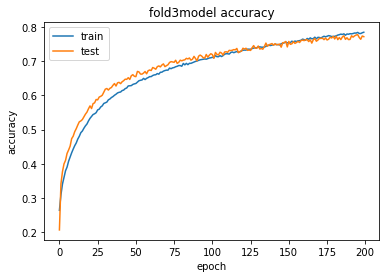

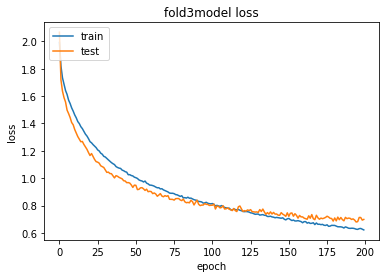

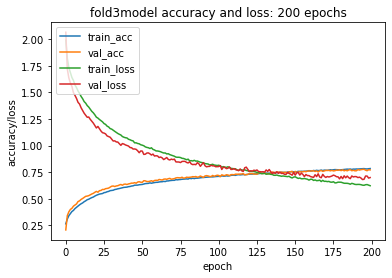

In [54]:
history3 = trainfold(3)

plot_graphs(3, history3)

# Fold 4

In [55]:
# Fold 4

model = Sequential()
intput_shape=(x_train.shape[1], 1)
model.add(Conv1D(128, kernel_size=3,padding = 'same',activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=(2)))
model.add(Conv1D(128,kernel_size=3,padding = 'same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=(2)))
#model.add(Conv1D(64,kernel_size=3,padding = 'same', activation='relu'))
#model.add(MaxPooling1D(pool_size=(2)))
model.add(Flatten())
model.add(Dense(64, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 70, 128)           512       
_________________________________________________________________
batch_normalization_4 (Batch (None, 70, 128)           512       
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 35, 128)           0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 35, 128)           49280     
_________________________________________________________________
batch_normalization_5 (Batch (None, 35, 128)           512       
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 17, 128)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2176)             

fold data train data test: (62464, 70) (15616, 70)
fold label train data test: (62464, 4) (15616, 4)
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
(62464, 70, 1)
Epoch 1/200
244/244 [==============================] - ETA: 0s - loss: 1.9619 - accuracy: 0.2650
Epoch 00001: accuracy improved from -inf to 0.26502, saving model to fold_4_model_final2.hdf5
244/244 [==============================] - 36s 149ms/step - loss: 1.9619 - accuracy: 0.2650 - val_loss: 1.9182 - val_accuracy: 0.2786
Epoch 2/200
244/244 [==============================] - ETA: 0s - loss: 1.8315 - accuracy: 0.3030
Epoch 00002: accuracy improved from 0.26502 to 0.30297, saving model to fold_4_model_final2.hdf5
244/244 [==============================] - 37s 151ms/

Epoch 50/200
244/244 [==============================] - ETA: 0s - loss: 1.0329 - accuracy: 0.6215
Epoch 00050: accuracy improved from 0.61840 to 0.62154, saving model to fold_4_model_final2.hdf5
244/244 [==============================] - 33s 135ms/step - loss: 1.0329 - accuracy: 0.6215 - val_loss: 0.9706 - val_accuracy: 0.6413
Epoch 51/200
244/244 [==============================] - ETA: 0s - loss: 1.0263 - accuracy: 0.6239
Epoch 00051: accuracy improved from 0.62154 to 0.62394, saving model to fold_4_model_final2.hdf5
244/244 [==============================] - 33s 136ms/step - loss: 1.0263 - accuracy: 0.6239 - val_loss: 0.9772 - val_accuracy: 0.6448
Epoch 52/200
244/244 [==============================] - ETA: 0s - loss: 1.0211 - accuracy: 0.6258
Epoch 00052: accuracy improved from 0.62394 to 0.62582, saving model to fold_4_model_final2.hdf5
244/244 [==============================] - 33s 136ms/step - loss: 1.0211 - accuracy: 0.6258 - val_loss: 0.9567 - val_accuracy: 0.6502
Epoch 53/200


Epoch 76/200
244/244 [==============================] - ETA: 0s - loss: 0.9124 - accuracy: 0.6673
Epoch 00076: accuracy improved from 0.66618 to 0.66728, saving model to fold_4_model_final2.hdf5
244/244 [==============================] - 34s 137ms/step - loss: 0.9124 - accuracy: 0.6673 - val_loss: 0.8748 - val_accuracy: 0.6895
Epoch 77/200
244/244 [==============================] - ETA: 0s - loss: 0.9143 - accuracy: 0.6681
Epoch 00077: accuracy improved from 0.66728 to 0.66814, saving model to fold_4_model_final2.hdf5
244/244 [==============================] - 34s 137ms/step - loss: 0.9143 - accuracy: 0.6681 - val_loss: 0.8787 - val_accuracy: 0.6887
Epoch 78/200
244/244 [==============================] - ETA: 0s - loss: 0.9171 - accuracy: 0.6661
Epoch 00078: accuracy did not improve from 0.66814
244/244 [==============================] - 33s 134ms/step - loss: 0.9171 - accuracy: 0.6661 - val_loss: 0.8837 - val_accuracy: 0.6835
Epoch 79/200
244/244 [==============================] - ETA

Epoch 102/200
244/244 [==============================] - ETA: 0s - loss: 0.8400 - accuracy: 0.6955
Epoch 00102: accuracy did not improve from 0.69923
244/244 [==============================] - 33s 134ms/step - loss: 0.8400 - accuracy: 0.6955 - val_loss: 0.8306 - val_accuracy: 0.7077
Epoch 103/200
244/244 [==============================] - ETA: 0s - loss: 0.8294 - accuracy: 0.6997
Epoch 00103: accuracy improved from 0.69923 to 0.69970, saving model to fold_4_model_final2.hdf5
244/244 [==============================] - 33s 135ms/step - loss: 0.8294 - accuracy: 0.6997 - val_loss: 0.8338 - val_accuracy: 0.7081
Epoch 104/200
244/244 [==============================] - ETA: 0s - loss: 0.8361 - accuracy: 0.6995
Epoch 00104: accuracy did not improve from 0.69970
244/244 [==============================] - 33s 134ms/step - loss: 0.8361 - accuracy: 0.6995 - val_loss: 0.8155 - val_accuracy: 0.7139
Epoch 105/200
244/244 [==============================] - ETA: 0s - loss: 0.8320 - accuracy: 0.7002
Epo

Epoch 156/200
244/244 [==============================] - ETA: 0s - loss: 0.7148 - accuracy: 0.7454
Epoch 00156: accuracy improved from 0.74116 to 0.74536, saving model to fold_4_model_final2.hdf5
244/244 [==============================] - 34s 139ms/step - loss: 0.7148 - accuracy: 0.7454 - val_loss: 0.7569 - val_accuracy: 0.7443
Epoch 157/200
244/244 [==============================] - ETA: 0s - loss: 0.7229 - accuracy: 0.7447
Epoch 00157: accuracy did not improve from 0.74536
244/244 [==============================] - 34s 140ms/step - loss: 0.7229 - accuracy: 0.7447 - val_loss: 0.7540 - val_accuracy: 0.7458
Epoch 158/200
244/244 [==============================] - ETA: 0s - loss: 0.7215 - accuracy: 0.7458
Epoch 00158: accuracy improved from 0.74536 to 0.74577, saving model to fold_4_model_final2.hdf5
244/244 [==============================] - 34s 139ms/step - loss: 0.7215 - accuracy: 0.7458 - val_loss: 0.7662 - val_accuracy: 0.7421
Epoch 159/200
244/244 [==============================] -

Epoch 183/200
244/244 [==============================] - ETA: 0s - loss: 0.6856 - accuracy: 0.7591
Epoch 00183: accuracy did not improve from 0.76082
244/244 [==============================] - 34s 139ms/step - loss: 0.6856 - accuracy: 0.7591 - val_loss: 0.7337 - val_accuracy: 0.7557
Epoch 184/200
244/244 [==============================] - ETA: 0s - loss: 0.6756 - accuracy: 0.7635
Epoch 00184: accuracy improved from 0.76082 to 0.76351, saving model to fold_4_model_final2.hdf5
244/244 [==============================] - 34s 139ms/step - loss: 0.6756 - accuracy: 0.7635 - val_loss: 0.7273 - val_accuracy: 0.7635
Epoch 185/200
244/244 [==============================] - ETA: 0s - loss: 0.6730 - accuracy: 0.7620
Epoch 00185: accuracy did not improve from 0.76351
244/244 [==============================] - 34s 140ms/step - loss: 0.6730 - accuracy: 0.7620 - val_loss: 0.7308 - val_accuracy: 0.7620
Epoch 186/200
244/244 [==============================] - ETA: 0s - loss: 0.6675 - accuracy: 0.7641
Epo

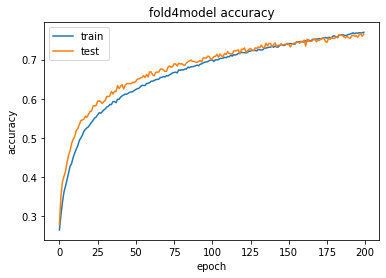

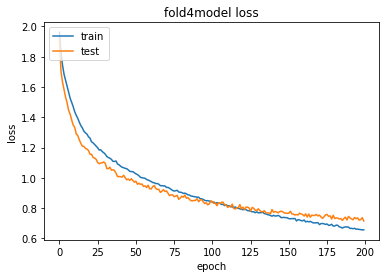

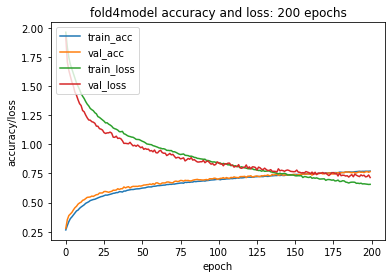

In [57]:
history4 = trainfold(4)

plot_graphs(4, history4)

# Fold 5

In [18]:
# Fold 5

model = Sequential()
intput_shape=(x_train.shape[1], 1)
model.add(Conv1D(128, kernel_size=3,padding = 'same',activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=(2)))
model.add(Conv1D(128,kernel_size=3,padding = 'same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=(2)))
#model.add(Conv1D(64,kernel_size=3,padding = 'same', activation='relu'))
#model.add(MaxPooling1D(pool_size=(2)))
model.add(Flatten())
model.add(Dense(64, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 70, 128)           512       
_________________________________________________________________
batch_normalization (BatchNo (None, 70, 128)           512       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 35, 128)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 35, 128)           49280     
_________________________________________________________________
batch_normalization_1 (Batch (None, 35, 128)           512       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 17, 128)           0         
_________________________________________________________________
flatten (Flatten)            (None, 2176)             

In [24]:
history5 = trainfold(5)

plot_graphs(5, history5)

fold data train data test: (62464, 70) (15616, 70)
fold label train data test: (62464, 4) (15616, 4)
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
(62464, 70, 1)
Epoch 1/200
244/244 [==============================] - ETA: 0s - loss: 2.0672 - accuracy: 0.2435
Epoch 00001: accuracy improved from -inf to 0.24352, saving model to fold_5_model_final2.hdf5
244/244 [==============================] - 41s 167ms/step - loss: 2.0672 - accuracy: 0.2435 - val_loss: 2.9229 - val_accuracy: 0.1041
Epoch 2/200
244/244 [==============================] - ETA: 0s - loss: 1.8557 - accuracy: 0.3042
Epoch 00002: accuracy improved from 0.24352 to 0.30424, saving model to fold_5_model_final2.hdf5
244/244 [==============================] - 37s 151ms/

244/244 [==============================] - ETA: 0s - loss: 0.9965 - accuracy: 0.6402
Epoch 00049: accuracy improved from 0.63910 to 0.64018, saving model to fold_5_model_final2.hdf5
244/244 [==============================] - 35s 144ms/step - loss: 0.9965 - accuracy: 0.6402 - val_loss: 0.9454 - val_accuracy: 0.6557
Epoch 50/200
244/244 [==============================] - ETA: 0s - loss: 0.9914 - accuracy: 0.6426 ETA: 0s - loss: 0.9911 - accuracy: 0.64
Epoch 00050: accuracy improved from 0.64018 to 0.64264, saving model to fold_5_model_final2.hdf5
244/244 [==============================] - 37s 150ms/step - loss: 0.9914 - accuracy: 0.6426 - val_loss: 0.9513 - val_accuracy: 0.6570
Epoch 51/200
244/244 [==============================] - ETA: 0s - loss: 0.9818 - accuracy: 0.6440
Epoch 00051: accuracy improved from 0.64264 to 0.64400, saving model to fold_5_model_final2.hdf5
244/244 [==============================] - 37s 151ms/step - loss: 0.9818 - accuracy: 0.6440 - val_loss: 0.9470 - val_acc

Epoch 75/200
244/244 [==============================] - ETA: 0s - loss: 0.8780 - accuracy: 0.6847
Epoch 00075: accuracy did not improve from 0.68590
244/244 [==============================] - 31s 126ms/step - loss: 0.8780 - accuracy: 0.6847 - val_loss: 0.8532 - val_accuracy: 0.7049
Epoch 76/200
244/244 [==============================] - ETA: 0s - loss: 0.8735 - accuracy: 0.6863
Epoch 00076: accuracy improved from 0.68590 to 0.68625, saving model to fold_5_model_final2.hdf5
244/244 [==============================] - 31s 125ms/step - loss: 0.8735 - accuracy: 0.6863 - val_loss: 0.8569 - val_accuracy: 0.6942
Epoch 77/200
244/244 [==============================] - ETA: 0s - loss: 0.8689 - accuracy: 0.6886
Epoch 00077: accuracy improved from 0.68625 to 0.68856, saving model to fold_5_model_final2.hdf5
244/244 [==============================] - 31s 127ms/step - loss: 0.8689 - accuracy: 0.6886 - val_loss: 0.8686 - val_accuracy: 0.6951
Epoch 78/200
244/244 [==============================] - ETA

244/244 [==============================] - ETA: 0s - loss: 0.7316 - accuracy: 0.7397
Epoch 00127: accuracy improved from 0.73937 to 0.73971, saving model to fold_5_model_final2.hdf5
244/244 [==============================] - 30s 121ms/step - loss: 0.7316 - accuracy: 0.7397 - val_loss: 0.7709 - val_accuracy: 0.7417
Epoch 128/200
244/244 [==============================] - ETA: 0s - loss: 0.7368 - accuracy: 0.7384
Epoch 00128: accuracy did not improve from 0.73971
244/244 [==============================] - 29s 120ms/step - loss: 0.7368 - accuracy: 0.7384 - val_loss: 0.7559 - val_accuracy: 0.7472
Epoch 129/200
244/244 [==============================] - ETA: 0s - loss: 0.7258 - accuracy: 0.7434
Epoch 00129: accuracy improved from 0.73971 to 0.74339, saving model to fold_5_model_final2.hdf5
244/244 [==============================] - 33s 136ms/step - loss: 0.7258 - accuracy: 0.7434 - val_loss: 0.7574 - val_accuracy: 0.7405
Epoch 130/200
244/244 [==============================] - ETA: 0s - los

Epoch 154/200
244/244 [==============================] - ETA: 0s - loss: 0.6759 - accuracy: 0.7636
Epoch 00154: accuracy improved from 0.76343 to 0.76362, saving model to fold_5_model_final2.hdf5
244/244 [==============================] - 35s 144ms/step - loss: 0.6759 - accuracy: 0.7636 - val_loss: 0.7352 - val_accuracy: 0.7554
Epoch 155/200
244/244 [==============================] - ETA: 0s - loss: 0.6755 - accuracy: 0.7634
Epoch 00155: accuracy did not improve from 0.76362
244/244 [==============================] - 33s 136ms/step - loss: 0.6755 - accuracy: 0.7634 - val_loss: 0.7525 - val_accuracy: 0.7519
Epoch 156/200
244/244 [==============================] - ETA: 0s - loss: 0.6804 - accuracy: 0.7612
Epoch 00156: accuracy did not improve from 0.76362
244/244 [==============================] - 31s 128ms/step - loss: 0.6804 - accuracy: 0.7612 - val_loss: 0.7336 - val_accuracy: 0.7570
Epoch 157/200
244/244 [==============================] - ETA: 0s - loss: 0.6715 - accuracy: 0.7648
Epo

Epoch 181/200
244/244 [==============================] - ETA: 0s - loss: 0.6351 - accuracy: 0.7793
Epoch 00181: accuracy improved from 0.77843 to 0.77928, saving model to fold_5_model_final2.hdf5
244/244 [==============================] - 38s 155ms/step - loss: 0.6351 - accuracy: 0.7793 - val_loss: 0.7036 - val_accuracy: 0.7705
Epoch 182/200
244/244 [==============================] - ETA: 0s - loss: 0.6295 - accuracy: 0.7806
Epoch 00182: accuracy improved from 0.77928 to 0.78058, saving model to fold_5_model_final2.hdf5
244/244 [==============================] - 40s 163ms/step - loss: 0.6295 - accuracy: 0.7806 - val_loss: 0.6986 - val_accuracy: 0.7690
Epoch 183/200
244/244 [==============================] - ETA: 0s - loss: 0.6311 - accuracy: 0.7800
Epoch 00183: accuracy did not improve from 0.78058
244/244 [==============================] - 32s 133ms/step - loss: 0.6311 - accuracy: 0.7800 - val_loss: 0.7063 - val_accuracy: 0.7718
Epoch 184/200
244/244 [==============================] -

NameError: name 'plt' is not defined

In [1]:
plot_graphs(5, history5)

NameError: name 'plot_graphs' is not defined